<a href="https://colab.research.google.com/github/ridhapadelia/Data-Mining-Checkpoint-1/blob/main/Data_Mining_Checkpoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Tingkat Adaptibilitas Siswa Dan Mahasiswa Dalam Pendidikan Online Berdasarkan Faktor-Faktor Yang Mempengaruhi**

#**Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari analisis ini adalah untuk mengevaluasi tingkat adaptabilitas siswa dan mahasiswa dalam pendidikan online dengan memahami faktor-faktor yang mempengaruhinya. Hal ini akan membantu institusi pendidikan dan pembuat kebijakan untuk meningkatkan efektivitas pendidikan online dan memberikan dukungan yang sesuai kepada siswa dan mahasiswa. Dengan ini, diharapkan dapat meningkatkan kualitas pembelajaran serta memperkuat adaptasi siswa dan mahasiswa di masa depan.



##**Assess Situation**

Situasi bisnis yang mendasari analisis ini adalah respons terhadap meningkatnya ketergantungan pada pembelajaran online akibat pandemi Covid-19 yang pernah melanda di hampir seluruh negara, juga dengan kondisi saat ini yang sudah mulai terbebas dari Covid-19 tetapi terkadang masih menggunakan pembelajaran secara online. Meskipun pembelajaran online menjadi solusi utama, terdapat tantangan dalam adaptasi siswa dan mahasiswa terhadap model pembelajaran ini.



##**Data Mining Goals**

Tujuan dari data mining pada dataset ini adalah untuk menganalisis dan mendalami tingkat adaptibilitas siswa dan mahasiswa dalam lingkungan pendidikan online dengan mempertimbangkan faktor-faktor yang mempengaruhi adaptibilitas mereka.



##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan pengumpulan data dari sumber data yang ada, lalu menyiapkan data dan menjelaskan karakteristik data serta pola-pola yang menarik akan diidentifikasi. Data kemudian dieksplorasi untuk mengidentifikasi korelasi antar variabel. Selanjutnya, melakukan analisis mendalam terhadap pola-pola yang ditemukan dan mengevaluasi relevansi korelasi tersebut terhadap tujuan analisis, lalu menginterpretasikan hasil analisis.



#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset "Students Adaptibilty Level In Online Education" ini diperoleh dari Kaggle, berikut tautannya: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

In [2]:
df = pd.read_csv('students_adaptability_level_online_education.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


##**Describe Data**

####Informasi Dasar

In [3]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (1205, 14)


dataset "Students Adaptibility Level in Online Education" ini terdiri dari 1205 baris dan 14 kolom

####Informasi Lanjutan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


**1. Kolom Gender**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis kelamin siswa dan mahasiswa tersebut, apakah laki-laki atau perempuan (Male/Female).

**2. Kolom Age**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai rentang umur siswa dan mahasiswa.

**3. Kolom Education Level**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai tingkat pendidikan yang ditempuh (University, College, atau School).

**4. Kolom Institution Type**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis institusi pendidikan siswa dan mahasiswa tersebut, apakah pemerintah atau bukan pemerintah (Goverment/Non Government).

**5. Kolom IT Student**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi yang menunjukkan apakah siswa dan mahasiswa tersebut termasuk siswa atau mahasiswa IT (Yes/No).

**6. Kolom Location**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai apakah siswa dan mahasiswa tersebut tinggal di daerah perkotaan (Yes/No).

**7. Kolom Load-Shedding**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai level pemadaman listrik di lokasi siswa dan mahasiswa tersebut tinggal, apakah sering dilakukan pemadaman atau jarang (Low/High).

**8. Kolom Financial Condition**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai kondisi finansial keluarga siswa atau mahasiswa tersebut apakah berkecukupan, menengah, atau kurang mampu. (Rich, Mid, Poor).

**9. Kolom Internet type**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis koneksi internet yang digunakan oleh siswa dan mahasiswa, apakah menggunakan mobile data atau wifi.

**10. Kolom Network Type**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai jenis jaringan apa yang digunakan, apakah 4G, 2G atau 3G.

**11. Kolom Class Duration**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai durasi kelas yang dihadiri dalam pembelajaran online.

**12. Kolom Self Lms**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai apakah institusi menyediakan Lms (Learning Management System) bagi siswa dan mahasiswa.

**13. Kolom Device**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi mengenai perangkat-perangkat apa saja yang digunakan oleh siswa maupun mahasiswa dalam pembelajaran online, apakah melalui perangkat mobile, komputer, atau tab.

**14. Kolom Adaptivity Level**
- Memiliki 1205 baris.
- Tipe data yang digunakan adalah object, kolom ini berisi informasi yang menunjukkan tingkat adaptablitas siswa maupun mahasiswa terhadap hadirnya pembelajaran online.

karena semua tipe data yang ada pada dataset ini merupakan tipe data object, disini saya akan merubah beberapa kolom yaitu kolom Age, Load-shedding, Financial Condition, Classs Duration dan Adaptivity level menjadi numerik.

In [5]:
age_mapping = {
    '1-5': 3,
    '6-10': 8,
    '11-15': 13,
    '16-20': 18,
    '21-25': 23,
    '25-30': 28
}
df['Age'] = df['Age'].map(age_mapping)

financial_mapping = {
    'Rich': 3,
    'Mid': 2,
    'Poor': 1
}
df['Financial Condition'] = df['Financial Condition'].map(financial_mapping)

load_shedding_mapping = {
    'Low': 1,
    'High': 2
}
df['Load-shedding'] = df['Load-shedding'].map(load_shedding_mapping)

adaptivity_mapping = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}
df['Adaptivity Level'] = df['Adaptivity Level'].map(adaptivity_mapping)

class_duration_mapping = {
    '1-3': 2,
    '3-6': 5,
    '0': 0
}
df['Class Duration'] = df['Class Duration'].map(class_duration_mapping)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               1205 non-null   object 
 1   Age                  1137 non-null   float64
 2   Education Level      1205 non-null   object 
 3   Institution Type     1205 non-null   object 
 4   IT Student           1205 non-null   object 
 5   Location             1205 non-null   object 
 6   Load-shedding        1205 non-null   int64  
 7   Financial Condition  1205 non-null   int64  
 8   Internet Type        1205 non-null   object 
 9   Network Type         1205 non-null   object 
 10  Class Duration       1205 non-null   int64  
 11  Self Lms             1205 non-null   object 
 12  Device               1205 non-null   object 
 13  Adaptivity Level     1205 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 131.9+ KB
None


Dapat terlihat disini pada kolom Age tipe data nya adalah float64 disini untuk rentang usia diwakilkan oleh nilai tengahnya seperti berikut'1-5'= 3, '6-10'= 8, '11-15'= 13, '16-20'= 18, '21-25'= 23, '25-30'= 28, begitupun pada kolom yang lain. Pada kolom Load-shedding tipe data nya int64 untuk tingkatanya 'Low'= 1, 'Moderate'= 2, 'High'= 3.  Pada kolom Financial Condition tipe data nya int64 untuk tingkatannya 'Low'= 1, 'High'= 2. Pada kolom Class Duration tipe data nya int64 dengan tingkatannya     '1-3'= 2, '3-6'= 5, '0'= 0.Pada kolom Adaptivity Level tipe datanya int64 dengan tingkatannya 'Low'= 1, 'Moderate'= 2, 'High'= 3.

####Informasi Statistik Deskriptif

In [6]:
df.describe()

,Age,Load-shedding,Financial Condition,Class Duration,Adaptivity Level
count,1137.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,16.575198,1.166805,1.869710,2.269710,1.684647
std,5.873657,0.372956,0.504584,1.419883,0.618221
min,3.000000,1.000000,1.000000,0.000000,1.000000
25%,13.000000,1.000000,2.000000,2.000000,1.000000
50%,18.000000,1.000000,2.000000,2.000000,2.000000
75%,23.000000,1.000000,2.000000,2.000000,2.000000
max,23.000000,2.000000,3.000000,5.000000,3.000000


**1. Kolom Age**
- Terdiri dari 1137 baris.
- Rata-rata usia responden adalah 16,57 dengan standar deviasi 5,87.
- Minimal usia responden adalah 3 tahun dan maksimalnya 23 tahun.
- 25% dari responden berusia 13 tahun, 50% dari responden berusia 18 tahun dan 75% dari responden berusia 23 tahun.

**2. Kolom Load-shedding**
- Terdiri dari 1205 baris.
- Rata-rata skor untuk Load-Shedding adalah 1,17 yang artinya kebanyakan responden menjawab bahwa tingkat pemadaman listrik yang terjadi cukup rendah,  dengan standar deviasi 0,37.
- Nilai minimum adalah 1 dan maksimum adalah 2.

**3. Kolom Financial Condition**
- Terdiri dari 1205 baris.
- Rata-rata skor adalah 1,87 dengan standar deviasi 0,50.
- Nilai minimum adalah 1 dan maksimum adalah 3.
- Rata-rata responden menjawab 2 yang artinya kondisi finansial responden berada pada tingkat menengah.

**4. Kolom Class Duration**
- Terdiri dari 1205 baris.
- Rata-rata durasi kelas adalah 2,27.
- Nilai minimum 0 dan maksimum adalah 5.

**5. Kolom Adaptivity Level**
- Terdiri dari 1205 baris.
- Rata-rata adaptivity level adalah 1,68.
- Nilai minimum adalah 1 dan maksimum adalah 3.


##**Exploratory Data Analysis**

**Perangkat apa yang paling banyak digunakan oleh siswa maupun mahasiswa dalam pembelajaran online?**

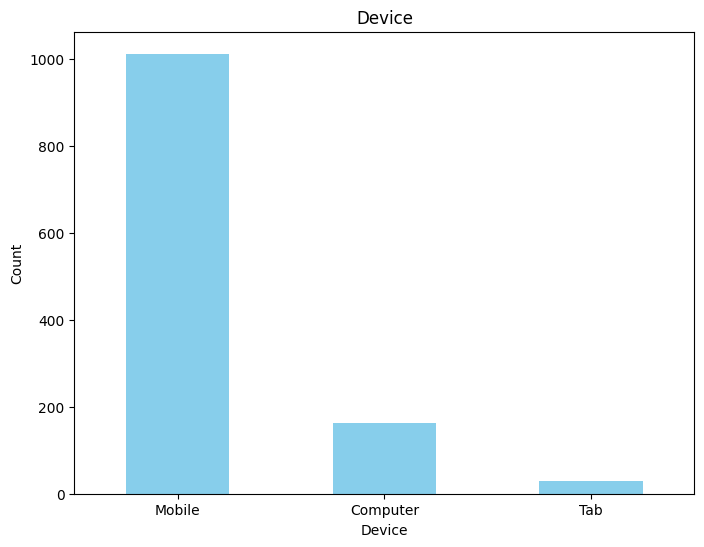

In [7]:
plt.figure(figsize=(8, 6))
df['Device'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Device')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Dari visualisasi yang tersaji di atas, terlihat bahwa perangkat mobile merupakan perangkat yang paling banyak digunakan oleh siswa dan mahasiswa dalam pembelajaran online ini, kemudian perangkat komputer dan yang terakhir perangkat tab yang termasuk sangat jarang digunakan.

<Axes: ylabel='Location'>

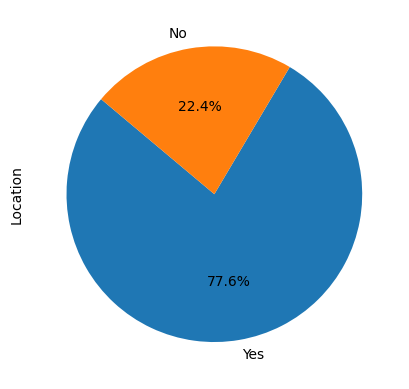

In [8]:
gender_counts  = df['Location'].value_counts()
gender_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=140)

Dari visualisasi yang tersaji di atas, terlihat bahwa mayoritas siswa dan mahasiswa berlokasi di daerah perkotaan yaitu dengan persentase sebesar 77,6% yang menjawab Yes dan sisanya yaitu sebesar 22,4% berlokasi di luar dari daerah perkotaan.

**Apakah Siswa dan Mahasiswa berasal dari jurusan IT?**

<ipython-input-9-0542546578a2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IT Student', data=df, palette='Set2')


<Axes: xlabel='IT Student', ylabel='count'>

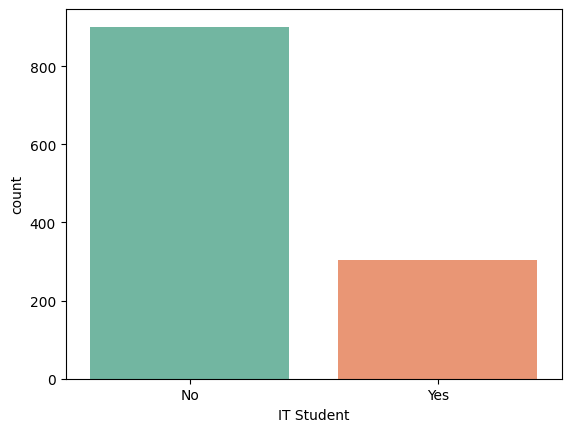

In [9]:
sns.countplot(x='IT Student', data=df, palette='Set2')

Dari visualisasi data mengenai IT Student yang tersaji di atas, terlihat bahwa mayoritas siswa dan mahasiswa dalam dataset menjawab NO, hal ini menunjukkan bahwa responden siswa dan mahasiswa yang berpartisispasi dalam pembelajaran online ini dominan tidak berasal dari jurusan IT.

<Axes: ylabel='Education Level'>

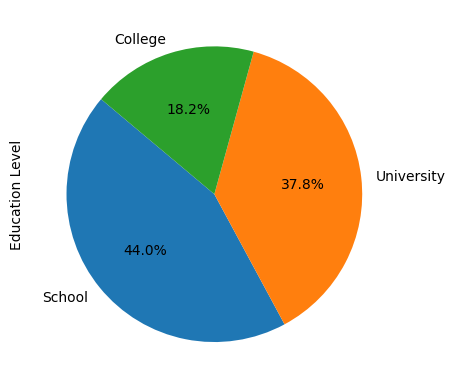

In [10]:
gender_counts  = df['Education Level'].value_counts()
gender_counts.plot(kind='pie',
                   autopct='%1.1f%%',
                   startangle=140)

Dari visualisasi yang tersaji di atas, terlihat bahwa mayoritas responden yang berpartisipasi dalam pembelajaran online ini adalah siswa yang ada pada tingkat pendidikan sekolah yaitu dengan persentase sebesar 44%.

<Axes: xlabel='Age', ylabel='Count'>

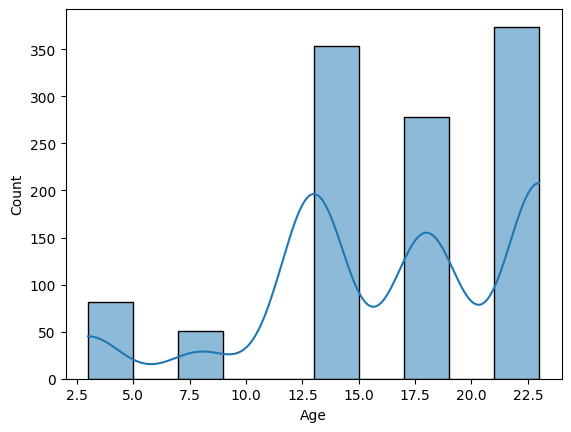

In [11]:
sns.histplot(df['Age'].dropna(), bins=10, kde=True)

Dari Visualisasi yang tersaji di atas, terlihat bahwa data umur berdistribusi tidak normal karena frekuensi setiap rentang usia tidak cukup merata.

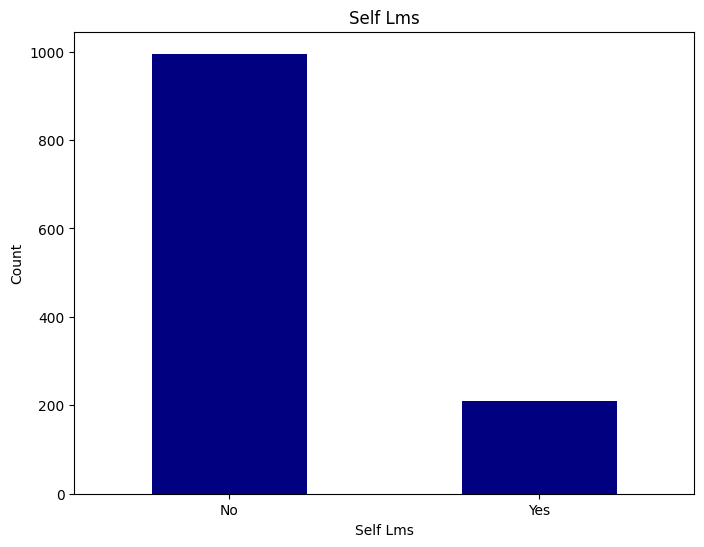

In [12]:
plt.figure(figsize=(8, 6))
df['Self Lms'].value_counts().plot(kind='bar', color='navy')
plt.title('Self Lms')
plt.xlabel('Self Lms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Dari visualisasi yang tersaji di atas, terlihat bahwa mayoritas siswa dan mahasiswa menjawab No, artinya institusi pendidikan siswa dan mahasiswa tersebut tidak menyediakan Lms mereka sendiri.

Korelasi Pearson

<Axes: >

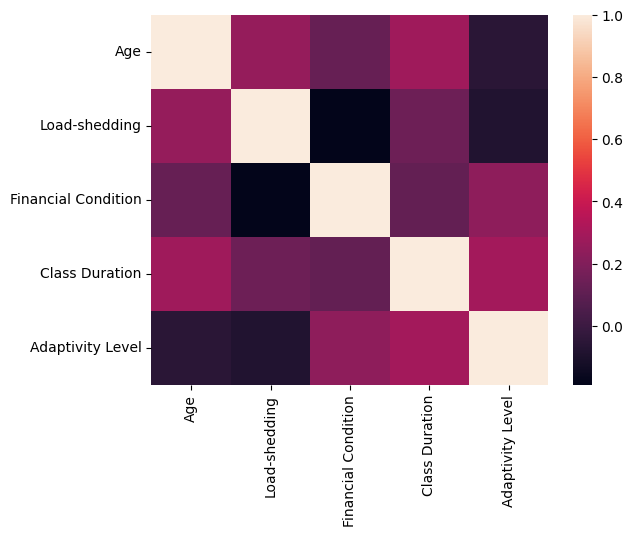

In [14]:
sns.heatmap(df.corr(numeric_only=True))

Korelasi antara kolom Age dan Financial Condition tidak ada keterkaitan.

Korelasi Kontingensi

In [13]:
data = df

contingency_table = pd.crosstab(df['Location'], df['Network Type'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
phi_corr = chi2 / n
min_dim = min(contingency_table.shape) - 1
cramer_v = (phi_corr / min_dim) ** 0.5

print("Tabel Kontingensi:")
print(contingency_table)
print("\nNilai Chi-square:", chi2)
print("Nilai p:", p)
print("Koefisien Korelasi Cramer's V:", cramer_v)

Tabel Kontingensi:
Network Type  2G   3G   4G
Location                  
No            14  117  139
Yes            5  294  636

Nilai Chi-square: 46.32880652031122
Nilai p: 8.70617690465965e-11
Koefisien Korelasi Cramer's V: 0.19607942865203182


Korelasi yang disajikan merupakan korelasi antara variabel Location dan Network Type. Hasilnya menunjukkan bahwa terdapat hubungan yang signifikan antara dua variabel tersebut (diliat dari nilai Chi-Square yang cukup tinggi), artinya ada pola yang jelas dalam bagaimana lokasi siswa dan mahasiswa terkait dengan jenis jaringan yang mereka gunakan. Namun, korelasi ini bersifat lemah hingga sedang yang berarti bahwa meskipun ada hubungan antara kedua variabel, hubungannya tidak terlalu kuat.

##**Verify Data Quality**

####Missing Values

In [15]:
pd.DataFrame(df.isna().sum() / len(df) *100, columns=['Null Ratio in '])

,Null Ratio in
Gender,0.000000
Age,5.643154
Education Level,0.000000
Institution Type,0.000000
IT Student,0.000000
Location,0.000000
Load-shedding,0.000000
Financial Condition,0.000000
Internet Type,0.000000
Network Type,0.000000


Dapat terlihat dari output di atas 13 kolom yang ada yaitu kolom Gender, Education Level, Institution Type, IT Student, Location, Load-shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self Lms, Device, Adaptivity Level tidak memiliki nilai null di dalamnya, sedangkan pada kolom Age memiliki nilai null di dalamnya.

####Outliers Values

In [16]:
def count_values(col):
  counts = col.value_counts()
  return counts

def detect_outliers(col):

  counts = count_values(col)

  n = len(col)
  threshold = n * 0.05

  outliers = counts[counts < threshold].index

  if len(outliers) > 0:
    print(f"Terdeteksi outlier pada kolom {col.name}:")
    print(outliers)
  else:
    print(f"Tidak ada outlier pada kolom {col.name}")

for col in df.columns:
  detect_outliers(df[col])

Tidak ada outlier pada kolom Gender
Terdeteksi outlier pada kolom Age:
Float64Index([8.0], dtype='float64')
Tidak ada outlier pada kolom Education Level
Tidak ada outlier pada kolom Institution Type
Tidak ada outlier pada kolom IT Student
Tidak ada outlier pada kolom Location
Tidak ada outlier pada kolom Load-shedding
Tidak ada outlier pada kolom Financial Condition
Tidak ada outlier pada kolom Internet Type
Terdeteksi outlier pada kolom Network Type:
Index(['2G'], dtype='object')
Tidak ada outlier pada kolom Class Duration
Tidak ada outlier pada kolom Self Lms
Terdeteksi outlier pada kolom Device:
Index(['Tab'], dtype='object')
Tidak ada outlier pada kolom Adaptivity Level


Dapat terlihat disini terdapat 3 kolom yang terdeteksi outlier yaitu kolom Age, kolom Network Type dan kolom Device. Nilai-nilai yang terdeteksi outlier ini merupakan data-data yang extrem/tidak wajar. Dan untuk kolom-kolom yang tidak terdeteksi outlier, artinya variasi nilai pada kolom tersebut wajar.

####Duplicated Values

In [17]:

for column in df.columns:
    if df[column].duplicated().any():
        print(f"Kolom '{column}' memiliki nilai duplikat.")
    else:
        print(f"Tidak ada nilai duplikat dalam kolom '{column}'.")


Kolom 'Gender' memiliki nilai duplikat.
Kolom 'Age' memiliki nilai duplikat.
Kolom 'Education Level' memiliki nilai duplikat.
Kolom 'Institution Type' memiliki nilai duplikat.
Kolom 'IT Student' memiliki nilai duplikat.
Kolom 'Location' memiliki nilai duplikat.
Kolom 'Load-shedding' memiliki nilai duplikat.
Kolom 'Financial Condition' memiliki nilai duplikat.
Kolom 'Internet Type' memiliki nilai duplikat.
Kolom 'Network Type' memiliki nilai duplikat.
Kolom 'Class Duration' memiliki nilai duplikat.
Kolom 'Self Lms' memiliki nilai duplikat.
Kolom 'Device' memiliki nilai duplikat.
Kolom 'Adaptivity Level' memiliki nilai duplikat.


Dataset ini memiliki Duplicated Values (nilai yang duplikat) dari masing-masing kolom. Dapat terlihat dari output di atas semua kolom yang ada yaitu kolom Gender, Age, Education Level, Institution Type, IT Student, Location, Load-shedding, Financial Condition, Internet Type, Network Type, Class Duration, Self Lms, Device, Adaptivity Level memiliki nilai duplikat di dalamnya. Hal ini disebabkan karena dataset ini didapatkan dari survei/kuesioner yang diisi oleh responden, maka wajar jika responden ada yang memilih jawaban yang sama untuk pertanyaan-pertanyaan tertentu, jumlah responden juga cukup banyak yaitu 1205 responden oleh karena itu jawabannya bisa saja sama.

####Inconsistent Values / Noise (Optional)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [18]:
print((df.isna().sum() / len(df)) * 100)

Gender                 0.000000
Age                    5.643154
Education Level        0.000000
Institution Type       0.000000
IT Student             0.000000
Location               0.000000
Load-shedding          0.000000
Financial Condition    0.000000
Internet Type          0.000000
Network Type           0.000000
Class Duration         0.000000
Self Lms               0.000000
Device                 0.000000
Adaptivity Level       0.000000
dtype: float64


Terdapat nilai kosong pada kolom Age

In [19]:
df[df['Age'].isnull()]

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
16,Girl,NaN,University,Government,Yes,Yes,1,1,Mobile Data,4G,0,No,Computer,1
27,Boy,NaN,University,Non Government,Yes,Yes,1,2,Wifi,4G,5,No,Computer,2
38,Girl,NaN,University,Government,No,No,1,1,Mobile Data,4G,2,No,Mobile,1
53,Boy,NaN,University,Government,Yes,No,1,1,Mobile Data,4G,2,No,Mobile,2
65,Boy,NaN,University,Government,No,No,1,2,Mobile Data,4G,2,No,Mobile,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,Boy,NaN,University,Government,Yes,Yes,1,3,Wifi,4G,2,No,Computer,3
1157,Boy,NaN,University,Government,Yes,Yes,1,3,Wifi,4G,2,No,Computer,3
1171,Boy,NaN,University,Government,Yes,Yes,1,3,Wifi,4G,2,No,Mobile,3
1176,Boy,NaN,University,Government,Yes,Yes,1,3,Wifi,4G,2,No,Computer,3


#####**Hapus Missing Values**

Karena persentase nilai kosong pada kolom Age hanya sebesar 5,64% maka tidak perlu menghapus missing values tetapi melakukan imputasi missing values.

#####**Imputasi Missing Values**

 Imputasi dilakukan menggunakan nilai analisis statistik kolom Age

In [22]:
df['Age'].dropna().describe()

count    1137.000000
mean       16.575198
std         5.873657
min         3.000000
25%        13.000000
50%        18.000000
75%        23.000000
max        23.000000
Name: Age, dtype: float64

Disini saya menggunakan mean dari kolom Age untuk imputasi nilai kosong tersebut

In [23]:
df['Age'] = df['Age'].fillna(df['Age'].dropna().mean())

#####**Pengecekkan Ulang**

In [24]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Gender,0.0
Age,0.0
Education Level,0.0
Institution Type,0.0
IT Student,0.0
Location,0.0
Load-shedding,0.0
Financial Condition,0.0
Internet Type,0.0
Network Type,0.0


Sekarang kolom Age sudah memiliki nilai.

###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [25]:
df[df.duplicated()]

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
28,Girl,3.0,School,Non Government,No,Yes,1,2,Mobile Data,4G,2,No,Mobile,2
29,Girl,18.0,College,Non Government,No,Yes,2,2,Wifi,4G,5,No,Mobile,2
34,Boy,13.0,School,Non Government,No,Yes,1,1,Mobile Data,3G,2,No,Mobile,1
42,Girl,18.0,School,Non Government,No,Yes,1,1,Mobile Data,3G,0,No,Mobile,1
43,Boy,13.0,School,Non Government,No,Yes,1,2,Mobile Data,4G,2,No,Mobile,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,18.0,College,Non Government,No,Yes,1,2,Wifi,4G,2,No,Mobile,1
1201,Girl,18.0,College,Non Government,No,No,2,2,Wifi,4G,5,No,Mobile,2
1202,Boy,13.0,School,Non Government,No,Yes,1,2,Mobile Data,3G,2,No,Mobile,2
1203,Girl,18.0,College,Non Government,No,No,1,2,Wifi,4G,2,No,Mobile,1


Dapat terlihat dari output di atas bahwa terdapat nilai duplikat pada dataset ini.

#####**Hapus Nilai Duplikat**

In [26]:
df = df.drop_duplicates()

Disini saya menghapus nilai duplikat yang ada pada dataset.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [27]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Age,0.000000
Load-shedding,21.093750
Financial Condition,28.515625
Class Duration,36.328125
Adaptivity Level,0.000000


Dapat terlihat disini bahwa ada 3 kolom yang terdapat outliers yaitu kolom Load-shedding, Financial Condition dan Class Duration.

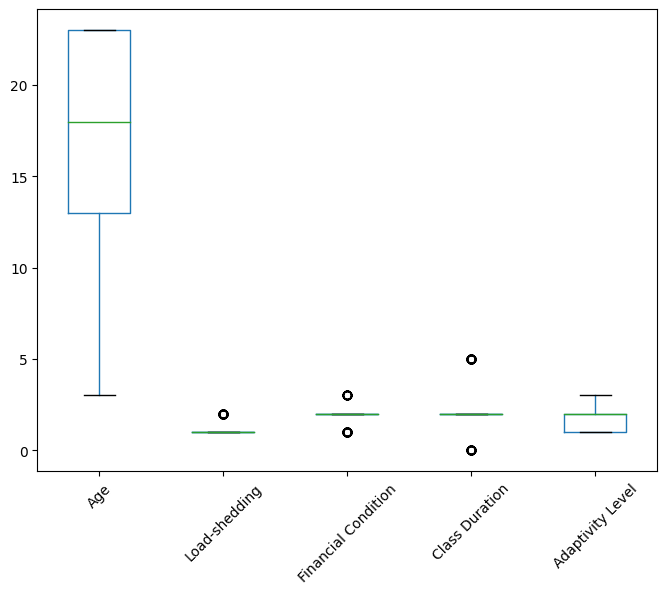

In [28]:
boxplot = df.boxplot(grid=False, rot=45, figsize=(8,6))

#####**Hapus Outliers**

In [29]:
Q1 = df['Load-shedding'].quantile(0.25)
Q3 = df['Load-shedding'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Load-shedding'] >= lower_bound) & (df['Load-shedding'] <= upper_bound)]

In [30]:
Q1 = df['Financial Condition'].quantile(0.25)
Q3 = df['Financial Condition'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Financial Condition'] >= lower_bound) & (df['Financial Condition'] <= upper_bound)]

In [31]:
Q1 = df['Class Duration'].quantile(0.25)
Q3 = df['Class Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Class Duration'] >= lower_bound) & (df['Class Duration'] <= upper_bound)]

Disini saya menghapus outlier yang ada pada koloom Looad-shedding, Financial Condition dan Class Duration.

#####**Pengecekkan Ulang**

In [32]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Age,0.0
Load-shedding,0.0
Financial Condition,0.0
Class Duration,0.0
Adaptivity Level,0.0


Dapat dilihat dari output di atas semua kolom sudah tidak memiliki outlier.

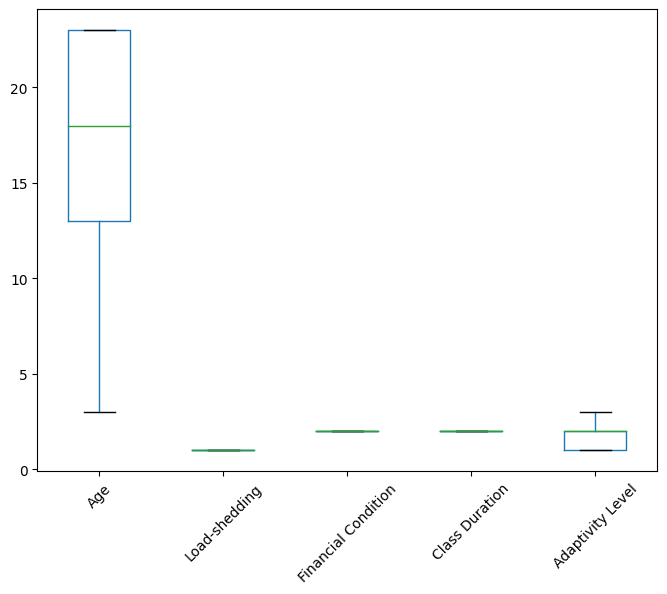

In [33]:
boxplot = df.boxplot(grid=False, rot=45, figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [34]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df['AgeCategory'] = df['Age'].apply(categorize_age)

Disini saya membuat kategori usia (AgeCategory) berdasarkan nilai usia dalam dataframme
- Jika usia kurang dari 18 tahun maka akan dikategorikan sebagai 'Child'
- Jika usia antara 18 hingga kurang dari 60 tahun maka akan dikategorikan sebagai 'Adult'
- Jika usia 60 keatas maka akan dikategorikan sebagai 'Elderly'

###**Pengecekkan Hasil**

In [35]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,AgeCategory
2,Girl,18.0,College,Government,No,Yes,1,2,Wifi,4G,2,No,Mobile,2,Adult
3,Girl,13.0,School,Non Government,No,Yes,1,2,Mobile Data,4G,2,No,Mobile,2,Child
7,Boy,13.0,School,Non Government,No,Yes,1,2,Wifi,4G,2,No,Mobile,2,Child
8,Boy,18.0,College,Government,No,Yes,1,2,Wifi,4G,2,No,Mobile,1,Adult
9,Boy,13.0,School,Non Government,No,Yes,1,2,Mobile Data,3G,2,No,Mobile,2,Child


DDapat terlihat disini bahwa terdapat kolom baru yaitu AgeCategory yang menampilkan kategori usia dari nilai pada kolom Age

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [36]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [37]:
df = df.drop(['Institution Type', 'IT Student'], axis=1)

Disini saya akan menghapus fitur yang kurang relevan. Ada 2 kolom yang saya hapus yaitu kolom Institution Type dan kolom IT Student.

###**Pengecekkan Hasil**

In [38]:
df.head()

,Gender,Age,Education Level,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,AgeCategory
2,Girl,18.0,College,Yes,1,2,Wifi,4G,2,No,Mobile,2,Adult
3,Girl,13.0,School,Yes,1,2,Mobile Data,4G,2,No,Mobile,2,Child
7,Boy,13.0,School,Yes,1,2,Wifi,4G,2,No,Mobile,2,Child
8,Boy,18.0,College,Yes,1,2,Wifi,4G,2,No,Mobile,1,Adult
9,Boy,13.0,School,Yes,1,2,Mobile Data,3G,2,No,Mobile,2,Child


Dapat terlihat dari data di atas bahwa kolom Institution Type dan kolom IT Student sudah tidak ada pada dataset.

#**Data Transformation**

###**Mapping**

In [39]:
df['Gender'] = df['Gender'].map({'Boy':1,'Girl':0})
df['AgeCategory'] = df['AgeCategory'].map({'Child': 0, 'Adult': 1,'Elder': 2}).astype(int)

In [40]:
df

,Gender,Age,Education Level,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,AgeCategory
2,0,18.0,College,Yes,1,2,Wifi,4G,2,No,Mobile,2,1
3,0,13.0,School,Yes,1,2,Mobile Data,4G,2,No,Mobile,2,0
7,1,13.0,School,Yes,1,2,Wifi,4G,2,No,Mobile,2,0
8,1,18.0,College,Yes,1,2,Wifi,4G,2,No,Mobile,1,1
9,1,13.0,School,Yes,1,2,Mobile Data,3G,2,No,Mobile,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0,18.0,College,Yes,1,2,Wifi,4G,2,No,Computer,2,1
928,1,8.0,School,Yes,1,2,Mobile Data,3G,2,No,Mobile,1,0
954,0,8.0,School,Yes,1,2,Wifi,3G,2,No,Mobile,3,0
1132,1,18.0,College,Yes,1,2,Mobile Data,3G,2,No,Mobile,2,1


Disini saya mengubah nilai pada kolom Gender yang sebelumnya adalah Boy dan Girl disini saya ubah untuk angka 1 mewakili nilai 'Boy' dan angka 0 mewakili nilai 'Girl'.

###**Encoding**

In [41]:
df = pd.get_dummies(df)

###**Pengecekkan Hasil**

In [43]:
df.head()

,Gender,Age,Load-shedding,Financial Condition,Class Duration,Adaptivity Level,AgeCategory,Education Level_College,Education Level_School,Education Level_University,...,Internet Type_Mobile Data,Internet Type_Wifi,Network Type_2G,Network Type_3G,Network Type_4G,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
2,0,18.0,1,2,2,2,1,1,0,0,...,0,1,0,0,1,1,0,0,1,0
3,0,13.0,1,2,2,2,0,0,1,0,...,1,0,0,0,1,1,0,0,1,0
7,1,13.0,1,2,2,2,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
8,1,18.0,1,2,2,1,1,1,0,0,...,0,1,0,0,1,1,0,0,1,0
9,1,13.0,1,2,2,2,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0


Dapat terlihat disini bahwa nilai pada kolom gender sudah berubah yang sebelumnya adalah 'Female' dan 'Male' sekarang menjadi '0' dan '1'.

#**Konversi DataFrame Ke File CSV**

In [45]:
df.to_csv("Data Cleaned.csv", index=False)